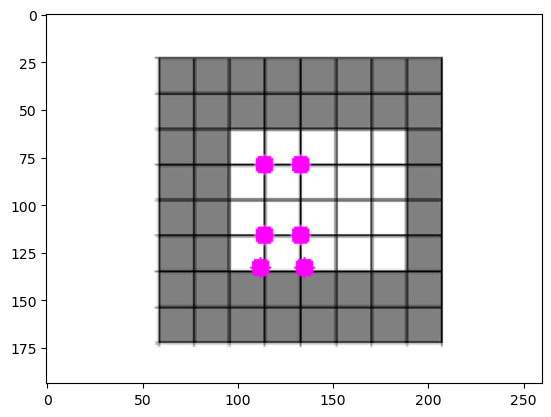

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("../imgs/corner.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cor= cv2.goodFeaturesToTrack(gray, 6, 0.01, 10)
cor= np.intp(cor)
for i in cor:
    x, y=i[0]
    cv2.circle(img,(x, y), 5, (255, 0, 255), -1)
plt.imshow(img[...,::-1])

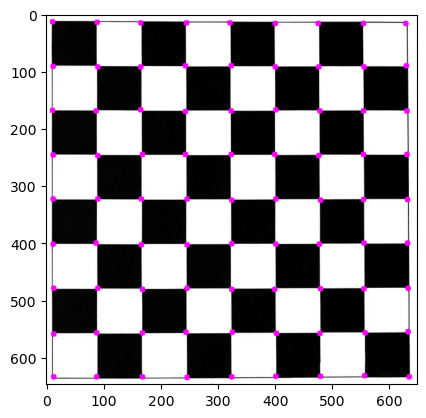

In [3]:
import cv2
import numpy as np

img = cv2.imread("../imgs/chess.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cor= cv2.goodFeaturesToTrack(gray, 81, 0.01, 10)
cor= np.intp(cor)
for i in cor:
    x, y=i[0]
    cv2.circle(img,(x, y), 5, (255, 0, 255), -1)
plt.imshow(img[...,::-1])